In [1]:
#library import
from pyspark import SparkContext
sc = SparkContext()

In [2]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [3]:
#reading data
train = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('E:/Jobs/Teko/2014-new-york-city-taxi-trips/nyc_taxi_data_2014.csv/nyc_taxi_data_2014.csv')

In [4]:
#lets understand schema
train.printSchema()

root
 |-- vendor_id: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_longitude: double (nullable = true)
 |-- pickup_latitude: double (nullable = true)
 |-- rate_code: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: double (nullable = true)
 |-- dropoff_latitude: double (nullable = true)
 |-- payment_type: string (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- surcharge: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)



In [5]:
#top 5 observation
train.head(5)

[Row(vendor_id='CMT', pickup_datetime=datetime.datetime(2014, 1, 9, 20, 45, 25), dropoff_datetime=datetime.datetime(2014, 1, 9, 20, 52, 31), passenger_count=1, trip_distance=0.7, pickup_longitude=-73.99477, pickup_latitude=40.736828, rate_code=1, store_and_fwd_flag='N', dropoff_longitude=-73.982227, dropoff_latitude=40.73179, payment_type='CRD', fare_amount=6.5, surcharge=0.5, mta_tax=0.5, tip_amount=1.4, tolls_amount=0.0, total_amount=8.9),
 Row(vendor_id='CMT', pickup_datetime=datetime.datetime(2014, 1, 9, 20, 46, 12), dropoff_datetime=datetime.datetime(2014, 1, 9, 20, 55, 12), passenger_count=1, trip_distance=1.4, pickup_longitude=-73.982392, pickup_latitude=40.773382, rate_code=1, store_and_fwd_flag='N', dropoff_longitude=-73.960449, dropoff_latitude=40.763995, payment_type='CRD', fare_amount=8.5, surcharge=0.5, mta_tax=0.5, tip_amount=1.9, tolls_amount=0.0, total_amount=11.4),
 Row(vendor_id='CMT', pickup_datetime=datetime.datetime(2014, 1, 9, 20, 44, 47), dropoff_datetime=datetim

In [6]:
#2 observations systamaticaly
train.show(2,truncate= True)

+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+---------+------------------+-----------------+----------------+------------+-----------+---------+-------+----------+------------+------------+
|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|trip_distance|pickup_longitude|pickup_latitude|rate_code|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|surcharge|mta_tax|tip_amount|tolls_amount|total_amount|
+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+---------+------------------+-----------------+----------------+------------+-----------+---------+-------+----------+------------+------------+
|      CMT|2014-01-09 20:45:25|2014-01-09 20:52:31|              1|          0.7|       -73.99477|      40.736828|        1|                 N|       -73.982227|        40.73179|         CRD|        6.5|      0.5|    0.5|  

In [7]:
#number of columns and their name
len(train.columns), train.columns

(18,
 ['vendor_id',
  'pickup_datetime',
  'dropoff_datetime',
  'passenger_count',
  'trip_distance',
  'pickup_longitude',
  'pickup_latitude',
  'rate_code',
  'store_and_fwd_flag',
  'dropoff_longitude',
  'dropoff_latitude',
  'payment_type',
  'fare_amount',
  'surcharge',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'total_amount'])

In [8]:
#summary of passenger column
train.describe('passenger_count').show()

+-------+------------------+
|summary|   passenger_count|
+-------+------------------+
|  count|          14999999|
|   mean|1.7018262467884164|
| stddev|   1.3907359239059|
|    min|                 0|
|    max|               208|
+-------+------------------+



In [9]:
train.select('payment_type','total_amount').show(5)

+------------+------------+
|payment_type|total_amount|
+------------+------------+
|         CRD|         8.9|
|         CRD|        11.4|
|         CRD|        14.0|
|         CRD|        10.2|
|         CRD|        8.75|
+------------+------------+
only showing top 5 rows



In [10]:
#summary of whole data
train.describe().show()

+-------+---------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------+------------------+-------------------+--------------------+------------------+-------------------+------------------+
|summary|vendor_id|   passenger_count|     trip_distance| pickup_longitude|   pickup_latitude|         rate_code|store_and_fwd_flag| dropoff_longitude| dropoff_latitude|payment_type|       fare_amount|          surcharge|             mta_tax|        tip_amount|       tolls_amount|      total_amount|
+-------+---------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------+------------------+-------------------+--------------------+------------------+-------------------+------------------+
|  count| 14999999|          14999999|          14999999|         14999999|          14999999|   

In [11]:
train.select('vendor_id','trip_distance','total_amount').show(5)

+---------+-------------+------------+
|vendor_id|trip_distance|total_amount|
+---------+-------------+------------+
|      CMT|          0.7|         8.9|
|      CMT|          1.4|        11.4|
|      CMT|          2.3|        14.0|
|      CMT|          1.7|        10.2|
|      CMT|          0.9|        8.75|
+---------+-------------+------------+
only showing top 5 rows



In [12]:
#distinct vendors
train.select('vendor_id').distinct().count()

2

In [13]:
train.select('payment_type').distinct().count()

5

In [14]:
#how many na
train.dropna().count()

7363922

In [15]:
#replace na with 0
train.fillna(0).show(2)

+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+---------+------------------+-----------------+----------------+------------+-----------+---------+-------+----------+------------+------------+
|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|trip_distance|pickup_longitude|pickup_latitude|rate_code|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|surcharge|mta_tax|tip_amount|tolls_amount|total_amount|
+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+---------+------------------+-----------------+----------------+------------+-----------+---------+-------+----------+------------+------------+
|      CMT|2014-01-09 20:45:25|2014-01-09 20:52:31|              1|          0.7|       -73.99477|      40.736828|        1|                 N|       -73.982227|        40.73179|         CRD|        6.5|      0.5|    0.5|  

In [16]:
train.filter(train.passenger_count > 50).count()

19

In [17]:
#vendor wise avg total amount
train.groupby('vendor_id').agg({'total_amount': 'mean'}).show()

+---------+------------------+
|vendor_id| avg(total_amount)|
+---------+------------------+
|      CMT|14.371711953633726|
|      VTS|14.669886369070491|
+---------+------------------+



In [18]:
#vendor wise avg trip distance
train.groupby('vendor_id').agg({'trip_distance': 'mean'}).show()

+---------+------------------+
|vendor_id|avg(trip_distance)|
+---------+------------------+
|      CMT|2.7408971031781566|
|      VTS|2.8414421092738995|
+---------+------------------+



In [19]:
train.groupby('payment_type').agg({'total_amount': 'mean'}).show()

+------------+------------------+
|payment_type| avg(total_amount)|
+------------+------------------+
|         CSH|11.912878538264918|
|         DIS|14.416341116751274|
|         CRD| 16.39765721363154|
|         UNK|15.412063041509525|
|         NOC|12.033627767732787|
+------------+------------------+



In [20]:
train.groupby('payment_type').agg({'trip_distance': 'mean'}).show()

+------------+------------------+
|payment_type|avg(trip_distance)|
+------------+------------------+
|         CSH| 2.488056520824789|
|         DIS| 3.053583756345175|
|         CRD| 3.011124684305925|
|         UNK|2.8203279131692405|
|         NOC| 2.383119423778057|
+------------+------------------+



In [21]:
train.groupby('payment_type').count().show()

+------------+-------+
|payment_type|  count|
+------------+-------+
|         CSH|6215019|
|         DIS|   9850|
|         CRD|8667410|
|         UNK|  73983|
|         NOC|  33737|
+------------+-------+



In [22]:
train.orderBy(train.passenger_count.desc()).show(1)

+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+---------+------------------+-----------------+----------------+------------+-----------+---------+-------+----------+------------+------------+
|vendor_id|    pickup_datetime|   dropoff_datetime|passenger_count|trip_distance|pickup_longitude|pickup_latitude|rate_code|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|surcharge|mta_tax|tip_amount|tolls_amount|total_amount|
+---------+-------------------+-------------------+---------------+-------------+----------------+---------------+---------+------------------+-----------------+----------------+------------+-----------+---------+-------+----------+------------+------------+
|      VTS|2014-01-27 08:40:00|2014-01-27 08:40:00|            208|          0.0|             0.0|            0.0|        1|              null|              0.0|             0.0|         CSH|        3.3|      1.8|    0.0|  

In [23]:
train.crosstab('vendor_id', 'payment_type').show()

+----------------------+-------+-------+----+-----+-----+
|vendor_id_payment_type|    CRD|    CSH| DIS|  NOC|  UNK|
+----------------------+-------+-------+----+-----+-----+
|                   VTS|4386020|3174890|   0|    0|73983|
|                   CMT|4281390|3040129|9850|33737|    0|
+----------------------+-------+-------+----+-----+-----+



In [24]:
from pyspark.sql.functions import mean, min, max
train.select([mean('total_amount'), min('total_amount'), max('total_amount')]).show()

+------------------+-----------------+-----------------+
| avg(total_amount)|min(total_amount)|max(total_amount)|
+------------------+-----------------+-----------------+
|14.523480614230522|              2.5|            700.0|
+------------------+-----------------+-----------------+



In [25]:
train.stat.cov('trip_distance', 'total_amount')

36.18249878607134

In [26]:
train.stat.corr('trip_distance', 'total_amount')

0.8940906374520139

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
pdDF = nonNullDF.toPandas()
pdDF.plot(x='payment_type', y='total_amount', kind='bar', rot=45)
display()

#this code is not working because of less memory space
#Py4JJavaError: An error occurred while calling o30.collectToPython.
#: org.apache.spark.SparkException: Job aborted due to stage failure: Task 7 in stage 4.0 failed 1 times, most recent failure: Lost task 7.0 in stage 4.0 (TID 68, localhost, executor driver): java.lang.OutOfMemoryError: Java heap space

KeyboardInterrupt: 

In [4]:
#then took a sample to work with
df = train.sample(False, 0.1).limit(100000)

In [5]:
df.describe().show()

+-------+---------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------+-----------------+------------------+--------------------+------------------+-------------------+------------------+
|summary|vendor_id|   passenger_count|     trip_distance|  pickup_longitude|  pickup_latitude|         rate_code|store_and_fwd_flag| dropoff_longitude|  dropoff_latitude|payment_type|      fare_amount|         surcharge|             mta_tax|        tip_amount|       tolls_amount|      total_amount|
+-------+---------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------+-----------------+------------------+--------------------+------------------+-------------------+------------------+
|  count|   100000|            100000|            100000|            100000|           100000|      

In [6]:
dat = df.toPandas()

In [7]:
print (dat.shape)

(100000, 18)


In [8]:
dat

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:44:04,2014-01-09 21:05:45,1,3.6,-73.984138,40.726317,1,N,-73.962869,40.758443,CRD,16.5,0.5,0.5,5.25,0.0,22.75
1,CMT,2014-01-09 16:51:35,2014-01-09 17:00:17,1,1.7,-74.007503,40.725992,1,N,-73.988182,40.734583,CRD,8.5,1.0,0.5,2.00,0.0,12.00
2,CMT,2014-01-09 16:43:37,2014-01-09 16:56:23,1,1.6,-73.970117,40.752862,1,N,-73.954138,40.764081,CRD,10.0,1.0,0.5,1.00,0.0,12.50
3,CMT,2014-01-09 16:48:42,2014-01-09 17:13:00,1,2.3,-73.989092,40.736672,1,N,-73.985742,40.762699,CRD,16.0,1.0,0.5,1.00,0.0,18.50
4,CMT,2014-01-09 21:49:26,2014-01-09 21:55:20,1,1.4,-74.002429,40.734449,1,N,-73.986076,40.740220,CRD,6.5,0.5,0.5,1.50,0.0,9.00
5,CMT,2014-01-09 21:49:31,2014-01-09 21:51:59,1,0.5,-73.989530,40.734316,1,N,-73.983347,40.734478,CRD,4.0,0.5,0.5,1.00,0.0,6.00
6,CMT,2014-01-09 21:48:44,2014-01-09 22:00:51,1,3.2,-73.985560,40.731588,1,N,-73.984357,40.691515,CRD,12.5,0.5,0.5,2.70,0.0,16.20
7,CMT,2014-01-09 21:48:43,2014-01-09 21:48:55,1,0.0,-73.990763,40.720590,2,N,-73.990760,40.720599,CRD,52.0,0.0,0.5,10.50,0.0,63.00
8,CMT,2014-01-09 21:56:31,2014-01-09 22:14:33,1,3.8,-73.952195,40.781405,1,N,-73.986074,40.734866,CRD,15.0,0.5,0.5,2.00,0.0,18.00
9,CMT,2014-01-09 21:56:40,2014-01-09 22:08:58,1,5.3,-73.947182,40.776074,1,N,-73.986671,40.720916,CRD,17.0,0.5,0.5,3.60,0.0,21.60


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [10]:
plt.style.use('classic')

In [11]:
%matplotlib inline

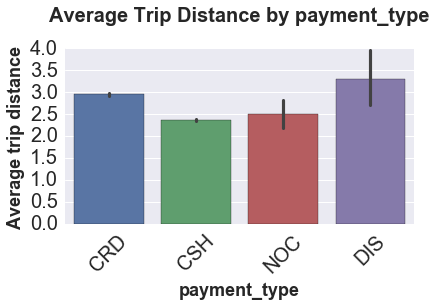

In [38]:
g = sns.factorplot(kind='bar',        # Boxplot
               y='trip_distance',       # Y-axis - values for boxplot
               x='payment_type',        # X-axis - first factor
               data=dat,        # Dataframe 
               size=4,            # Figure size (x100px)      
               aspect=1.6,        # Width = size * aspect 
               legend_out=False) 
plt.title('Average Trip Distance by payment_type\n', weight = 'bold', size = 20)
plt.xlabel('payment_type', size = 18,weight = 'bold')
plt.ylabel('Average trip distance', size = 18,weight = 'bold')
g.set_xticklabels(rotation=45)

In [15]:
dat['pickup_datetime'] = pd.to_datetime(dat['pickup_datetime'])
dat["pickup_day"] = dat["pickup_datetime"].dt.strftime('%u').astype(int)
dat["pickup_hour"] = dat["pickup_datetime"].dt.strftime('%H').astype(int)
dat["pickup_month"] = dat["pickup_datetime"].dt.strftime('%m').astype(int)

In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine_distance(row):
#     lon1, lat1, lon2, lat2):
    """
    Calculate the circle distance between two points in lat and lon
    on the earth (specified in decimal degrees)
    returning distance in miles
    """
    # need to convert decimal degrees to radians 
    # a unit of angle, equal to an angle at the center of a circle whose arc is equal in length to the radius.
    lon1, lat1, lon2, lat2 = row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
#applying to the dataset
dat['haversine_distance'] = dat.apply(haversine_distance, axis=1)

In [17]:
weekday_dict = {1: "Mon",
                       2: "Tues",
                       3: "Wed",
                       4: "Thurs",
                       5: "Fri",
                       6: "Sat",
                       7: "Sun"}
dat['weekday']=dat['pickup_day'].map(weekday_dict)

In [18]:
month_dict = {1: "Jan",
                       2: "Feb",
                       3: "March",
                       4: "April",
                       5: "May",
                       6: "June",
                       7:"July",
                       8:"Aug",
                       9:"Sep",
                       10:"Oct",
                       11:"Nov",
                       12:"Dec"}
dat['month']=dat['pickup_month'].map(month_dict)

In [19]:
dat

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,total_amount,pickup_day,pickup_hour,pickup_month,haversine_distance,weekday,month
0,CMT,2014-01-09 20:44:04,2014-01-09 21:05:45,1,3.6,-73.984138,40.726317,1,N,-73.962869,...,0.5,5.25,0.0,22.75,4,20,1,3.996459,Thurs,Jan
1,CMT,2014-01-09 16:51:35,2014-01-09 17:00:17,1,1.7,-74.007503,40.725992,1,N,-73.988182,...,0.5,2.00,0.0,12.00,4,16,1,1.887602,Thurs,Jan
2,CMT,2014-01-09 16:43:37,2014-01-09 16:56:23,1,1.6,-73.970117,40.752862,1,N,-73.954138,...,0.5,1.00,0.0,12.50,4,16,1,1.835096,Thurs,Jan
3,CMT,2014-01-09 16:48:42,2014-01-09 17:13:00,1,2.3,-73.989092,40.736672,1,N,-73.985742,...,0.5,1.00,0.0,18.50,4,16,1,2.907796,Thurs,Jan
4,CMT,2014-01-09 21:49:26,2014-01-09 21:55:20,1,1.4,-74.002429,40.734449,1,N,-73.986076,...,0.5,1.50,0.0,9.00,4,21,1,1.519904,Thurs,Jan
5,CMT,2014-01-09 21:49:31,2014-01-09 21:51:59,1,0.5,-73.989530,40.734316,1,N,-73.983347,...,0.5,1.00,0.0,6.00,4,21,1,0.521273,Thurs,Jan
6,CMT,2014-01-09 21:48:44,2014-01-09 22:00:51,1,3.2,-73.985560,40.731588,1,N,-73.984357,...,0.5,2.70,0.0,16.20,4,21,1,4.457068,Thurs,Jan
7,CMT,2014-01-09 21:48:43,2014-01-09 21:48:55,1,0.0,-73.990763,40.720590,2,N,-73.990760,...,0.5,10.50,0.0,63.00,4,21,1,0.001032,Thurs,Jan
8,CMT,2014-01-09 21:56:31,2014-01-09 22:14:33,1,3.8,-73.952195,40.781405,1,N,-73.986074,...,0.5,2.00,0.0,18.00,4,21,1,5.909503,Thurs,Jan
9,CMT,2014-01-09 21:56:40,2014-01-09 22:08:58,1,5.3,-73.947182,40.776074,1,N,-73.986671,...,0.5,3.60,0.0,21.60,4,21,1,6.977321,Thurs,Jan


In [20]:
dat.to_csv('E:/Jobs/Teko/2014-new-york-city-taxi-trips/nyc_taxi_data_2014.csv/nyc_taxi_data_20141.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4142cb978>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4142b3278>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4142cb828>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4142b3ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4142b3ef0>],
 'means': []}

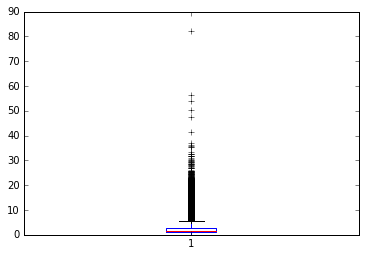

In [21]:
plt.boxplot(dat.trip_distance)

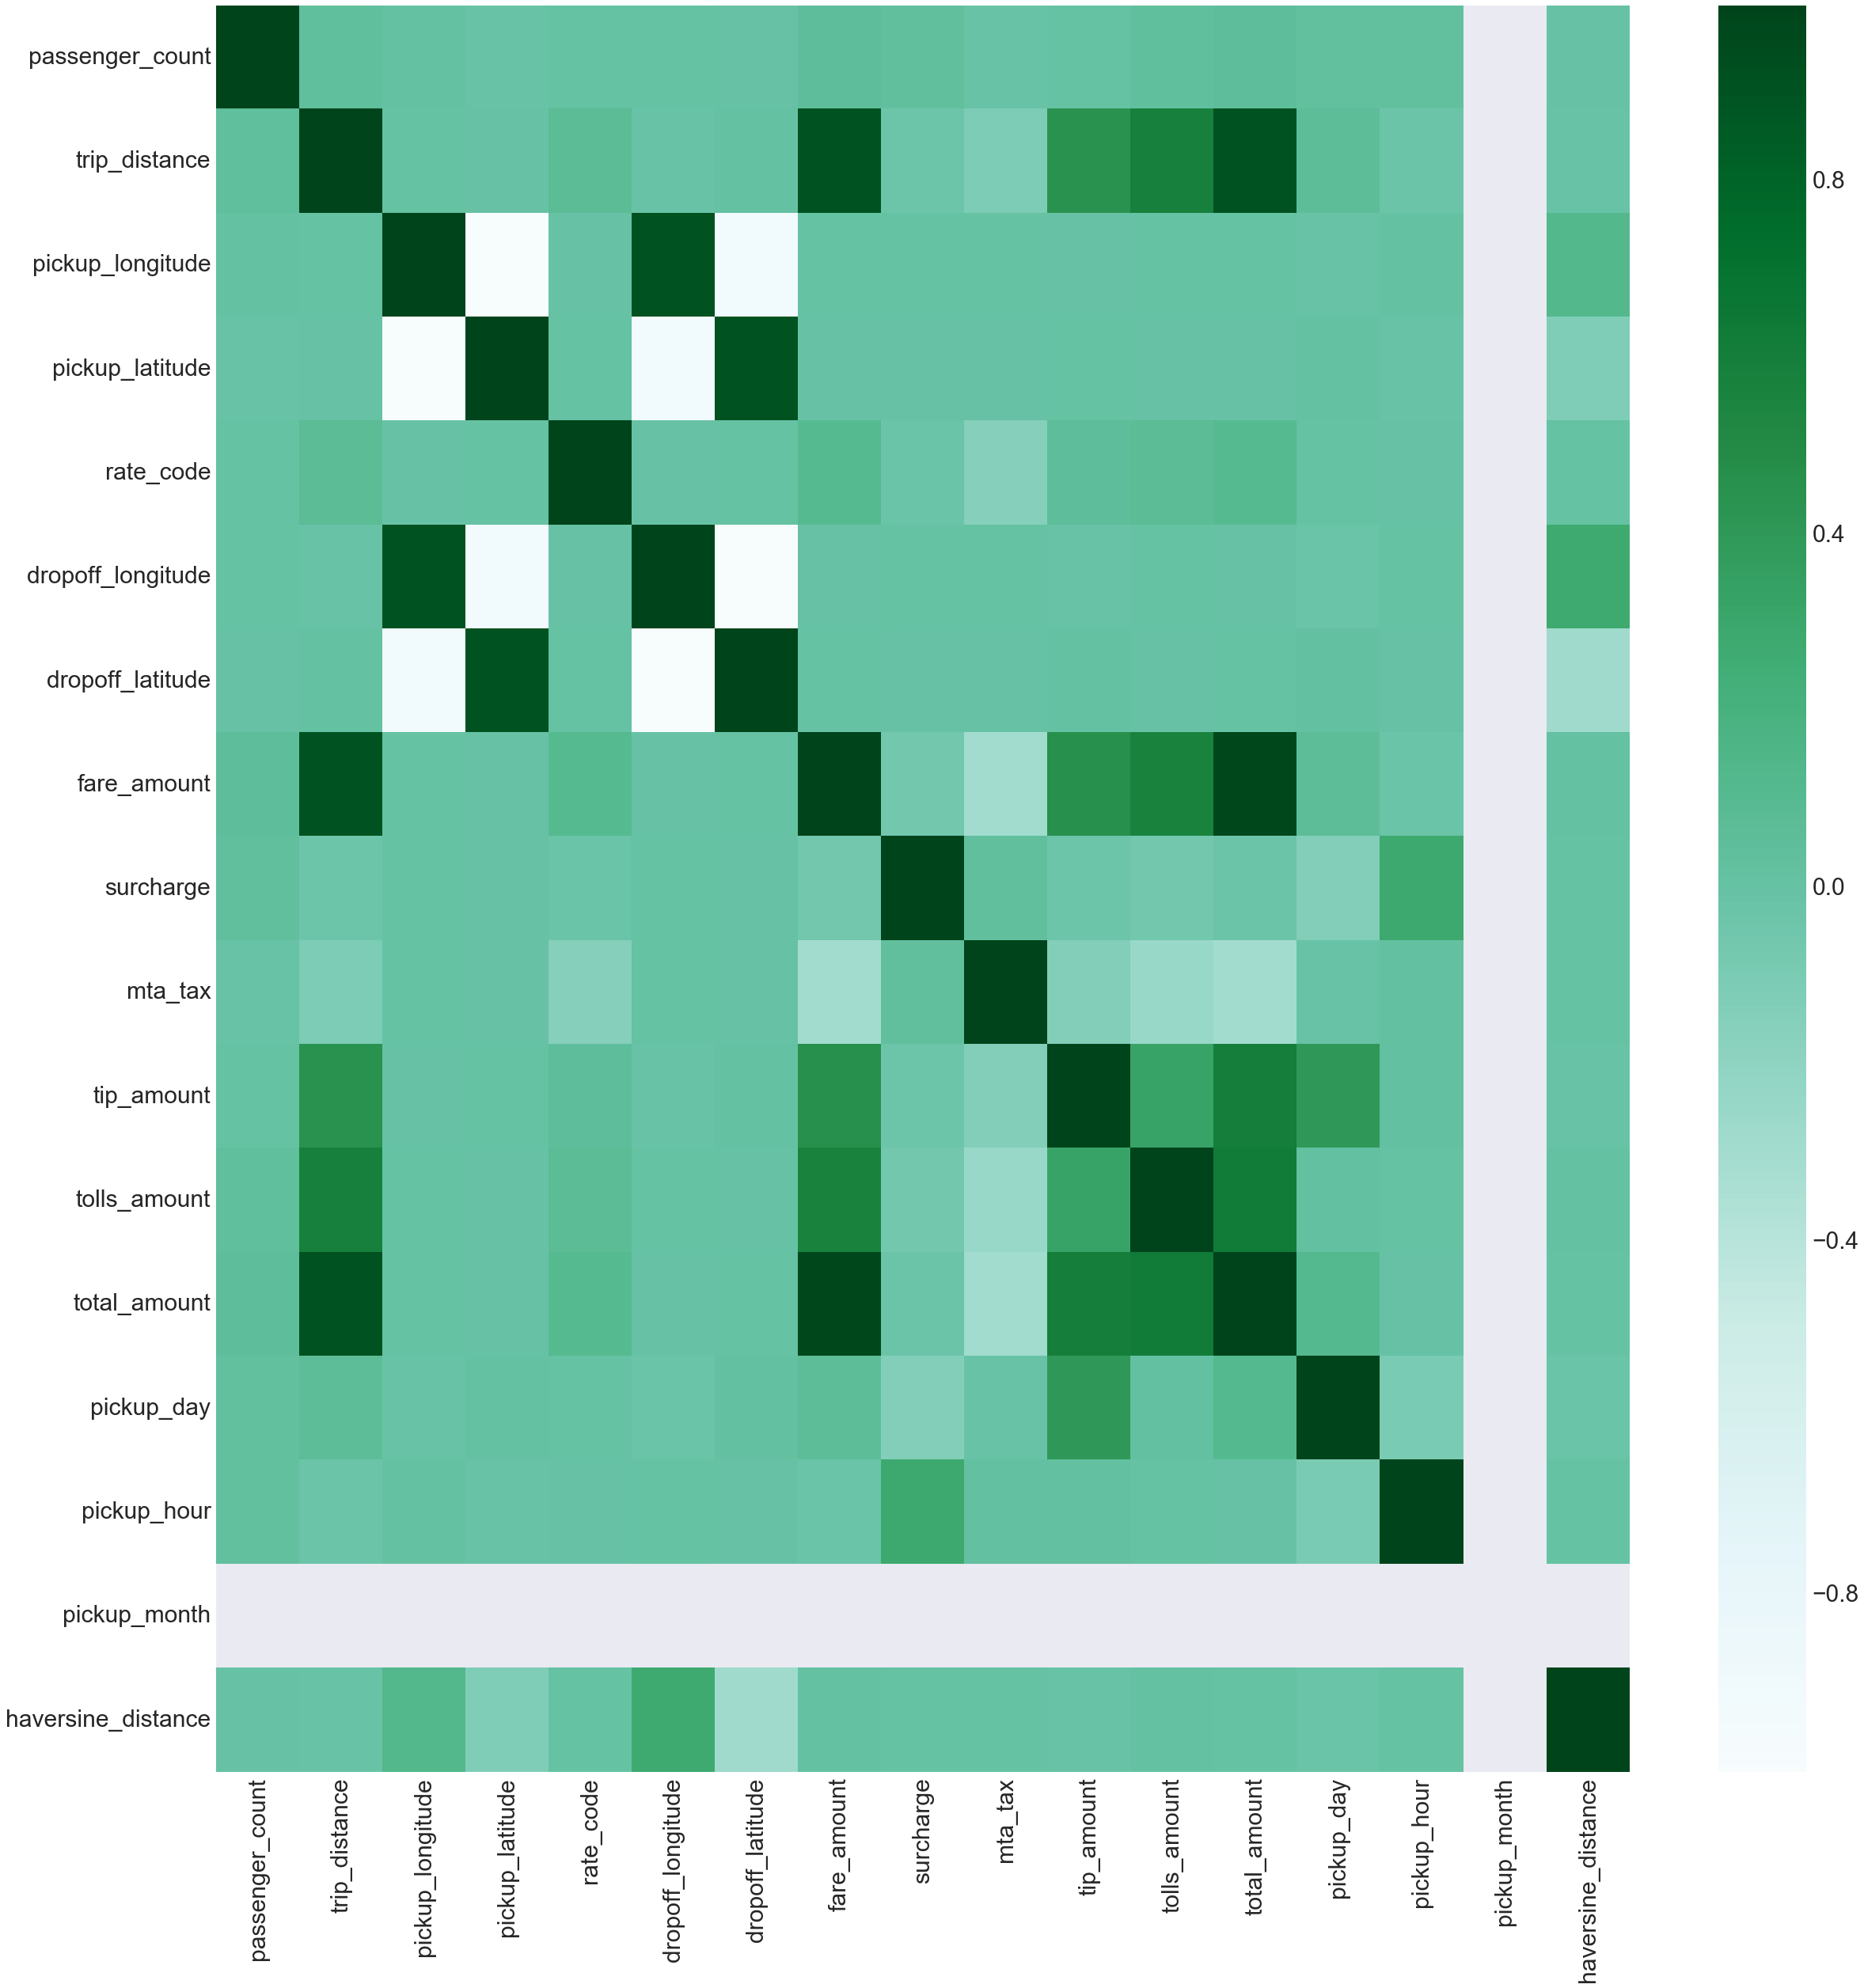

In [22]:
import seaborn as sns
sns.set(font_scale=3)
plt.figure(figsize=(40,40)) 
# play with the figsize until the plot is big enough to plot all the columns
# of your dataset, or the way you desire it to look like otherwise

#sns.heatmap(dat.corr())
sns.heatmap(dat.corr(), cmap='BuGn')

In [23]:
min(dat.trip_distance), max(dat.trip_distance)

(0.0, 82.1)

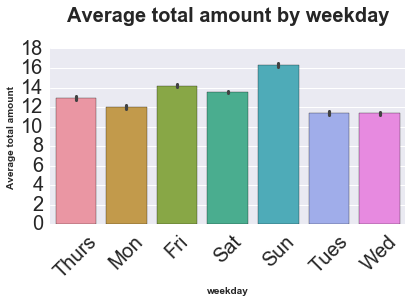

In [43]:
g = sns.factorplot(kind='bar',        # Boxplot
               y='total_amount',       # Y-axis - values for boxplot
               x='weekday',        # X-axis - first factor
               data=dat,        # Dataframe 
               size=4,            # Figure size (x100px)      
               aspect=1.6,        # Width = size * aspect 
               legend_out=False) 
plt.title('Average total amount by weekday\n', weight = 'bold', size = 20)
plt.xlabel('weekday', size = 10,weight = 'bold')
plt.ylabel('Average total amount', size = 10,weight = 'bold',fontsize=10)
g.set_xticklabels(rotation=45)